## UMAP Non-Linear Dimensionality Reduction

**We explore using images in grayscale data and a reduction of image size from wxh = 80x60 to 40x30 (50%). As it reduces the vector size from 14,000 to 1200. We will explore if we are able to map the data into clusters, ignoring the RGB color information. We would also get a glimpse if UMAP is using the color data heavily for its mapping**

In [1]:
from platform import python_version

print(python_version())

3.9.12


In [2]:
#import umap
import umap.umap_ as umap


In [3]:
import numpy as np
import pandas as pd
import datashader as ds
import datashader.utils as utils
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
import seaborn as sns

**The CSV file train_gray_small.csv' was later superseded by 'gray_small_train_set.csv' because I change its filename**

In [17]:
#this is the grayscale
source_df = pd.read_csv('train_gray_small.csv')

In [18]:
source_df.shape[1]

1201

In [19]:
source_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel1190,pixel1191,pixel1192,pixel1193,pixel1194,pixel1195,pixel1196,pixel1197,pixel1198,pixel1199
0,1,255,255,255,255,255,255,255,255,255,...,254,254,254,255,255,255,255,255,255,255
1,0,255,255,255,255,255,255,255,255,253,...,251,252,253,254,255,255,255,255,255,255
2,3,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,0,255,255,255,255,212,154,149,132,202,...,255,255,255,255,255,255,255,255,255,255
4,3,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [20]:

#data = source_df.iloc[:, :source_df.shape[1]].values.astype(np.float32)
data = source_df.iloc[:, 1:].values.astype(np.float32)


In [21]:
#target = source_df['class'].values
target = source_df['label'].values

**Reduced vector size**

In [22]:
data.shape, target.shape

((3377, 1200), (3377,))

In [23]:
label_key = {
    "Pants": 0, 
    "Tshirts":1,
    "Watches":2, 
    "Casual Shoes":3 
 
}

In [24]:
color_key = {
    "0": "#FF0000",  # Bright Red, Pants
    "1": "#00FF00",  # Bright Green, T-shirts
    "2": "#0000FF",  # Bright Blue, Watches
    "3": "#FFFF00",  # Bright Yellow, Casual Shoes

}

**The mapping below is very similar to using RGB full sized images, therefore going forward we will use grayscale images. The reduce vector size allows us to run trials faster.**

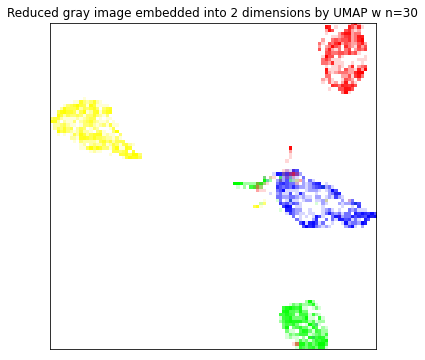

In [25]:
# Initialize UMAP
reducer = umap.UMAP(n_neighbors = 30, random_state=42)
#reducer = umap(random_state=42)


# Fit and transform the data
embedding = reducer.fit_transform(data)

# Prepare the data for visualization
df = pd.DataFrame(embedding, columns=('x', 'y'))

df['class'] = pd.Series([str(x) for x in target], dtype="category")

# Visualize the data using datashader

cvs = ds.Canvas(plot_width=100, plot_height=100)
agg = cvs.points(df, 'x', 'y', ds.count_cat('class'))
img = tf.shade(agg, color_key=color_key, how='eq_hist')
utils.export_image(img, filename='gray_small_30', background='white')

# Display the image
image = plt.imread('gray_small_30.png')
fig, ax = plt.subplots(figsize=(6, 6))
plt.imshow(image)
plt.setp(ax, xticks=[], yticks=[])
plt.title("Reduced gray image embedded into 2 dimensions by UMAP w n=30", fontsize=12)
plt.show()




**Best one is n=30**

**Export Mapped Coordinates to CSV**

In [26]:
# Ensure target is a 2D array with shape (3377, 1)
target = target[:, np.newaxis]

# Concatenate along the second axis
emb_target = np.concatenate((target, embedding), axis=1)

column_names = ['label','embedding x', 'embedding y']
embedding_df = pd.DataFrame( emb_target, columns=column_names)
embedding_df.head()

embedding_df.to_csv('umap_train_gray_small.csv', index=False, header=True)  

In [27]:
embedding_df = pd.read_csv('umap_train_gray_small.csv')
embedding_df.head()

,label,embedding x,embedding y
0,1.0,2.110022,-7.999280
1,0.0,5.100040,8.833552
2,3.0,-6.490954,2.556388
3,0.0,5.625717,7.953938
4,3.0,-8.826978,4.846537


**Save UMAP Embedding**

 We will need the UMAP embedding to reduce the unlabeled test data to 2 dimensions, therefore we save the UMAP Embedding.

In [28]:
# Save the trained model
import joblib
joblib.dump(reducer, 'umap_model_gray_small.pkl')



['umap_model_gray_small.pkl']